Hi, everyone. This Australia Rain dataset is my first case I worked and practiced on. I am still a beginner in data science. I hope I could get feedbacks to improve my skills. And I also hope this first work of mine would be helpful.

## Importing Basic Packages

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
#Importing Library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Loading Data

In [11]:
weather_aus = pd.read_csv('weatherAUS.csv')
print (weather_aus.head())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

In [12]:
weather_aus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

<AxesSubplot:>

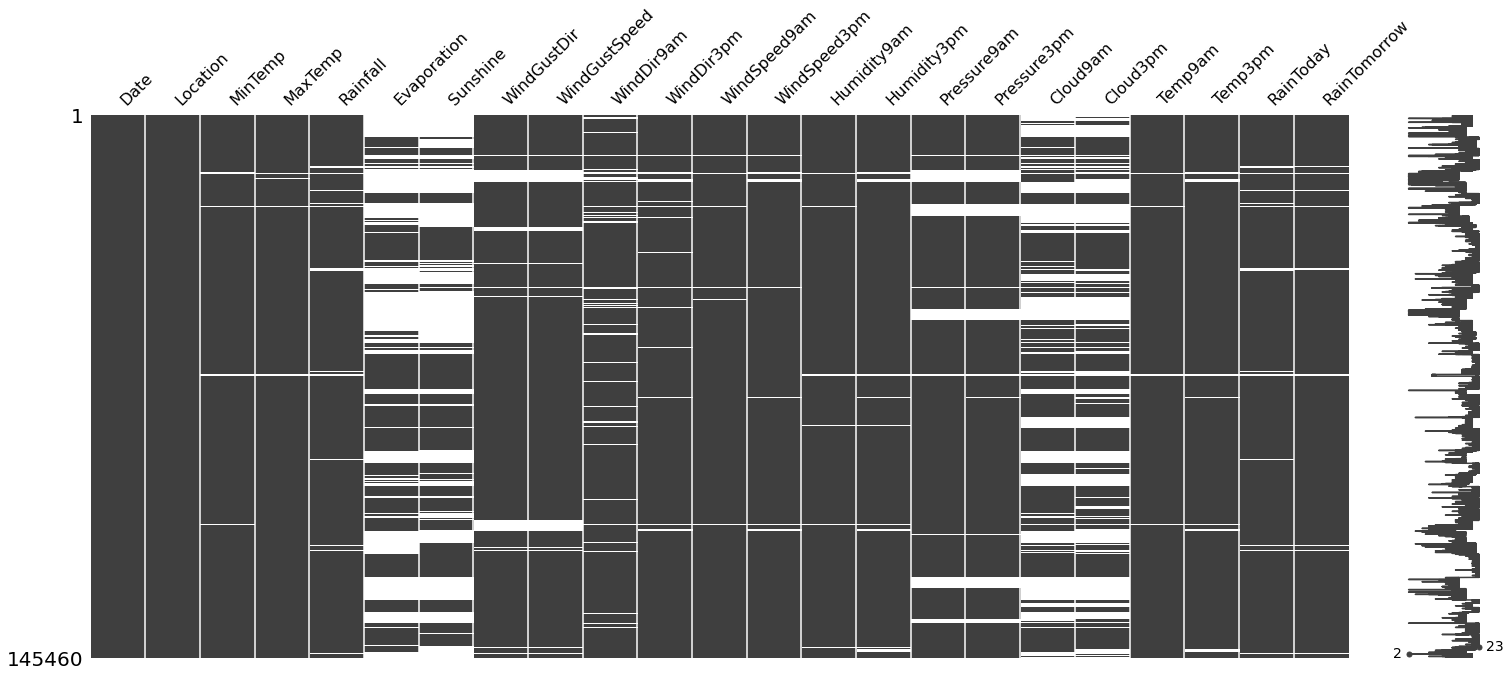

In [13]:
import missingno as msno
msno.matrix(weather_aus)

In [14]:
#Map the values of RainToday and RainTomorrow into 0 and 1
weather_aus['RainToday'] = weather_aus['RainToday'].map({'Yes': 1, 'No': 0})
weather_aus['RainTomorrow'] = weather_aus['RainTomorrow'].map({'Yes': 1, 'No': 0})

weather_aus.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


## Cleaning, Imputing, and Converting Data

From the null values of each column, I decide to drop Evaporation, Sunshine, Cloud9am, and Cloud3pm due to their lots of missing values

In [15]:
weather_aus = weather_aus.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1)
weather_aus.shape

(145460, 19)

Convert Date column into datetime object

In [16]:
weather_aus['Date'] = pd.to_datetime(weather_aus['Date'], format='%Y-%m-%d')

In [17]:
#Extract Month from Date column
weather_aus['Month'] = pd.DatetimeIndex(weather_aus['Date']).month

In [18]:
print (weather_aus.head())
print (weather_aus.dtypes)

        Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0 2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1 2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2 2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3 2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
4 2008-12-05   Albury     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          W        WNW          20.0          24.0         71.0         22.0   
1        NNW        WSW           4.0          22.0         44.0         25.0   
2          W        WSW          19.0          26.0         38.0         30.0   
3         SE          E          11.0           9.0         45.0         16.0   
4        ENE         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Tem

In [19]:
#Create list consisting of numerical parameters column
numcol = list(weather_aus.columns)
numcol.remove('Date')
numcol.remove('Location')
numcol.remove('WindGustDir')
numcol.remove('WindDir9am')
numcol.remove('WindDir3pm')
numcol.remove('RainToday')
numcol.remove('RainTomorrow')
numcol.remove('Month')

print (numcol)

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [20]:
#Create Location list
locations = list(weather_aus['Location'].unique())
print (locations)

['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree', 'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns', 'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston', 'AliceSprings', 'Darwin', 'Katherine', 'Uluru']


In [21]:
#Create Month list
monthes = list(range(1, 13))
print(monthes)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


### Missing Value in Numerical Column

Fill missing values in numerical column by generating mean. The statistical number shouldnt be generated from literally all rows. Each statistical values would be calculated based on its location and month. This is due to weather pattern that are different in each location and also have annual cycle in which every month typically has its own climate characteristics

In [22]:
#Create zeros matrix
#The matrix should be filled with mean of each numerical column month-wise and locationwise
guess_ammunition = [] 
for i in range(len(numcol)):
    guess_num = np.zeros((49, 12)) #49 represent no of locations, 12 represent no of monthes
    guess_ammunition.append(guess_num) #Guess ammunition would be a list of arrays

In [23]:
#Check if the number of guess_ammunition is the same with number of numerical columns
len(guess_ammunition) == len(numcol)

True

In [24]:
#Filling the guess ammunition as a list of arrays
for a in range(len(numcol)):
    for b in range(len(locations)):
        for c in range(len(monthes)):
            guess_data = weather_aus[(weather_aus['Location'] == locations[b]) & (weather_aus['Month'] == monthes[c])][numcol[a]].dropna()
            
            num_mean = guess_data.mean()
            
            guess_ammunition[a][b,c] = round(num_mean, 1)
            
    #Fill missing value in numerical parameters column from the guess ammunition arrays        
    for b in range(len(locations)):
        for c in range(len(monthes)):
            weather_aus.loc[(weather_aus[numcol[a]].isnull()) & (weather_aus['Location'] == locations[b]) & (weather_aus['Month'] == monthes[c]), numcol[a]] = guess_ammunition[a][b,c]

In [25]:
print (guess_ammunition)

[array([[16.9, 16.7, 13.8,  9.5,  5.5,  3.5,  3.7,  3.8,  5.8,  8.3, 12.6,
        14.5],
       [17.5, 17.5, 15.7, 12.1,  7.5,  6.3,  4.4,  4.9,  7.8, 10.6, 14.3,
        15.9],
       [21.6, 20.7, 17.6, 13.3,  8.9,  6.5,  5.4,  6.4,  9.2, 13. , 17. ,
        18.9],
       [20. , 19.8, 18.7, 15.5, 11.6,  9.8,  8.3,  8.8, 11.4, 13.9, 17.4,
        18.5],
       [20.7, 20.3, 17.9, 13.3,  8.6,  6.4,  5.1,  5.4,  8.9, 12.6, 17.5,
        19.2],
       [19.5, 19.6, 17.8, 14.3, 10.7,  9.2,  7.8,  8. , 10.8, 13.1, 16.3,
        17.8],
       [20.1, 20.3, 19.2, 16.3, 13.1, 11.4,  9.9, 10.7, 12.9, 14.9, 17.3,
        18.5],
       [19.6, 20.6, 19.6, 18.5, 16.5, 15.2, 14. , 13.8, 14.6, 15.2, 16.3,
        18.5],
       [18.9, 18.9, 17.1, 13.5,  9. ,  7.5,  5.6,  6.2,  9.4, 12.1, 15.8,
        17.3],
       [18.1, 18.2, 16.2, 12.3,  7.1,  6. ,  4.1,  4.6,  8. , 11. , 15. ,
        16.5],
       [20.3, 20.2, 18.9, 15.4, 12.1, 10.5,  9. ,  9.7, 12.6, 14.8, 17.4,
        18.6],
       [20.2, 20.4, 

In [26]:
weather_aus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   WindGustDir    135134 non-null  object        
 6   WindGustSpeed  139381 non-null  float64       
 7   WindDir9am     134894 non-null  object        
 8   WindDir3pm     141232 non-null  object        
 9   WindSpeed9am   145460 non-null  float64       
 10  WindSpeed3pm   145460 non-null  float64       
 11  Humidity9am    145460 non-null  float64       
 12  Humidity3pm    145460 non-null  float64       
 13  Pressure9am    133341 non-null  float64       
 14  Pressure3pm    133341 non-null  float64       
 15  

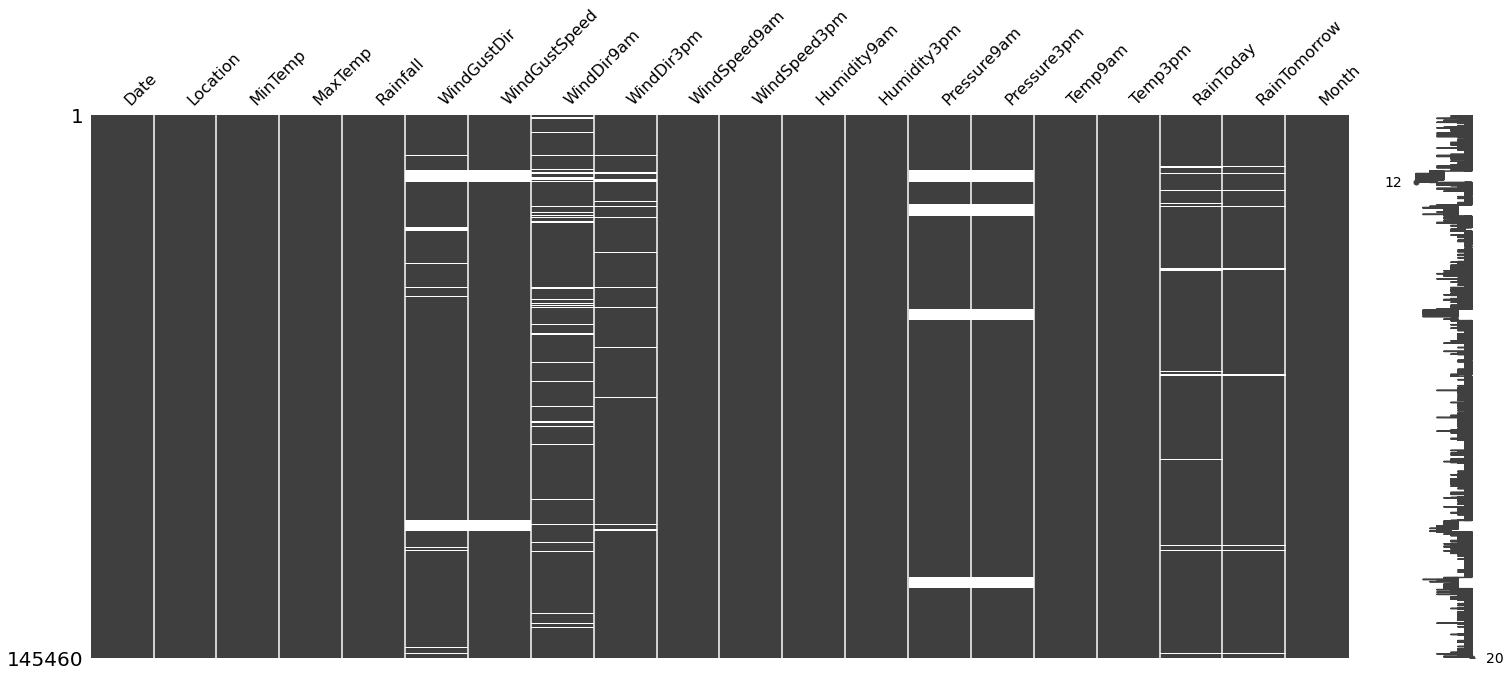

In [27]:
msno.matrix(weather_aus)
plt.show()

Based on previous missing data information and visualization, we could see several numerical parameter columns which still has missing values, namely WindGustSpeed, Pressure9am, and Pressure3pm. Afterwards we will investigate what best to fill these missing datas or even to drop them.

In [28]:
#Check cities which still have incomplete filled data in numerical columns
missed_data_loc = weather_aus[(weather_aus['Pressure9am'].isnull()) | (weather_aus['Pressure3pm'].isnull()) | (weather_aus['WindGustSpeed'].isnull())]['Location'].unique()
print (missed_data_loc)

['Newcastle' 'Penrith' 'MountGinini' 'Albany' 'SalmonGums']


In [29]:
#Check which monthes from the five cities above that has entirely unavailable data
for loc in missed_data_loc:
    print (weather_aus[(weather_aus['Pressure9am'].isnull()) & (weather_aus['Pressure3pm'].isnull()) & (weather_aus['Location'] == loc)]['Month'].unique())

[12  1  2  3  4  5  6  7  8  9 10 11]
[12  1  2  3  4  5  6  7  8  9 10 11]
[12  1  2  3  4  5  6  7  8  9 10 11]
[]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


There are five cities in which either one or more numerical parameters of WindGustSpeed, Pressure9am, and Pressure3pm are entirely missing even after being imputed. Furthermore, the entirely missing numerical parameter/s data in those cities could be observed from missing value matrix visualizations, where the large continuous white gap indicates the entirely missing or unrecorded data. Therefore, the cities would not be included for preprocessing and modelling

In [30]:
#Create new dataframe which exclude the five cities
for loc in missed_data_loc:
    locations.remove(loc)

print(locations)

['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree', 'NorahHead', 'NorfolkIsland', 'Richmond', 'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong', 'Canberra', 'Tuggeranong', 'Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns', 'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'Walpole', 'Hobart', 'Launceston', 'AliceSprings', 'Darwin', 'Katherine', 'Uluru']


In [32]:
#Create new dataset in which the locations' numerical columns are completely filled
included_loc = weather_aus['Location'].isin(locations)
weather_new = weather_aus[included_loc]
print (weather_new.head())

        Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0 2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1 2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2 2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3 2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
4 2008-12-05   Albury     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          W        WNW          20.0          24.0         71.0         22.0   
1        NNW        WSW           4.0          22.0         44.0         25.0   
2          W        WSW          19.0          26.0         38.0         30.0   
3         SE          E          11.0           9.0         45.0         16.0   
4        ENE         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Tem

### Encode or Map Categorical Object in Wind Directional Columns

In [33]:
print (weather_new.WindGustDir.unique())

['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']


In [34]:
#list of directional columns
dircol = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

#List for new encoded columns
enc_col = ['WindGustDir_enc', 'WindDir9am_enc', 'WindDir3pm_enc']

#Create map of these wind directions to numbers
dirmap = {'N':1, 'NNE':2, 'NE':3, 'ENE':4, 'E':5, 'ESE':6, 'SE':7, 'SSE':8, 'S':9, 'SSW':10, 'SW':11, 'WSW':12, 'W':13, 'WNW':14, 'NW':15, 'NNW':16}

for i in range(len(dircol)):
    weather_new[enc_col[i]] = weather_new[dircol[i]].map(dirmap)

In [35]:
print (weather_new.head())
print (weather_new['WindDir9am_enc'].unique())

        Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0 2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1 2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2 2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3 2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
4 2008-12-05   Albury     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  ...  Pressure9am  Pressure3pm  Temp9am  \
0          W        WNW          20.0  ...       1007.7       1007.1     16.9   
1        NNW        WSW           4.0  ...       1010.6       1007.8     17.2   
2          W        WSW          19.0  ...       1007.6       1008.7     21.0   
3         SE          E          11.0  ...       1017.6       1012.8     18.1   
4        ENE         NW           7.0  ...       1010.8       1006.0     17.8   

   Temp3pm  RainToday  RainTomor

### Impute Missing Value in Wind Directional Data

In [36]:
#Create zeros matrix
#The matrix should be filled with mode (most appeared value) of each directional column month-wise and locationwise
guessdir_ammunition = []
for i in range(len(dircol)):
    guess_dir = np.zeros((49, 12), dtype=int) #49 represent no of locations, 12 represent no of monthes
    guessdir_ammunition.append(guess_dir) #just like guess_ammunition, guessdir_ammunition is a list of arrays

In [37]:
for g in range(len(enc_col)):
    for h in range(len(locations)):
        for k in range(len(monthes)):
            guessdir_data = weather_new[(weather_new['Location'] == locations[h]) & (weather_new['Month'] == monthes[k])][enc_col[g]].dropna()
            
            dir_mode = guessdir_data.mode()
            
            guessdir_ammunition[g][h, k] = dir_mode[0]
            
    for h in range(len(locations)):
        for k in range(len(monthes)):
            weather_new.loc[(weather_new[enc_col[g]].isnull()) & (weather_new['Location'] == locations[h]) & (weather_new['Month'] == monthes[k]), enc_col[g]] = guessdir_ammunition[g][h, k]

In [38]:
#Remove original wind direction columns from weather_new dataset
weather_new = weather_new.drop(['WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1)

### Impute Missing Value in RainToday Column

Next, fill missing data in RainToday. The missing value could be obtained from RainTomorrow data from yesterday (one row above). However, in case the precedent RainTomorrow value is also missing, there should be another way to fill. RainToday consists of categorical value of whether it was rain or not which could be assumedly correlated with Rainfall. To observe the correlation, we would:
1. Check maximum Rainfall in 0 (No) RainToday
2. Check minimum Rainfall in 1 (Yes) RainToday
3. Explore data distributions with histogram.

In [42]:
#Check max Rainfall in 0 Raintoday
print (weather_new[weather_new["RainToday"] == 0]["Rainfall"].max())

1.0


In [43]:
#Check min Rainfall in 1 Raintoday
print (weather_new[weather_new["RainToday"] == 1]["Rainfall"].min())

1.1


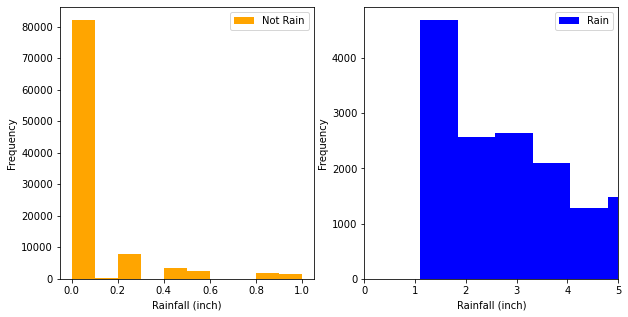

In [41]:
#Visualization of Rainfall Histogram
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(weather_new[weather_new["RainToday"] == 0]['Rainfall'], label="Not Rain", color="orange")
plt.xlabel("Rainfall (inch)")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(weather_new[weather_new["RainToday"] == 1]['Rainfall'], label="Rain", color="blue", bins=500)
plt.xlabel("Rainfall (inch)")
plt.ylabel("Frequency")
plt.xlim(0, 5)
plt.legend()

plt.show()

From the value check and comparison histogram, we could draw a boundary between Yes and No for RainToday in 1 inch Rainfall

In [44]:
weather_new.loc[(weather_new["Rainfall"] <= 1) & (weather_new["RainToday"].isnull()), "RainToday"] = 0
weather_new.loc[(weather_new["Rainfall"] > 1) & (weather_new["RainToday"].isnull()), "RainToday"] = 1   

<AxesSubplot:>

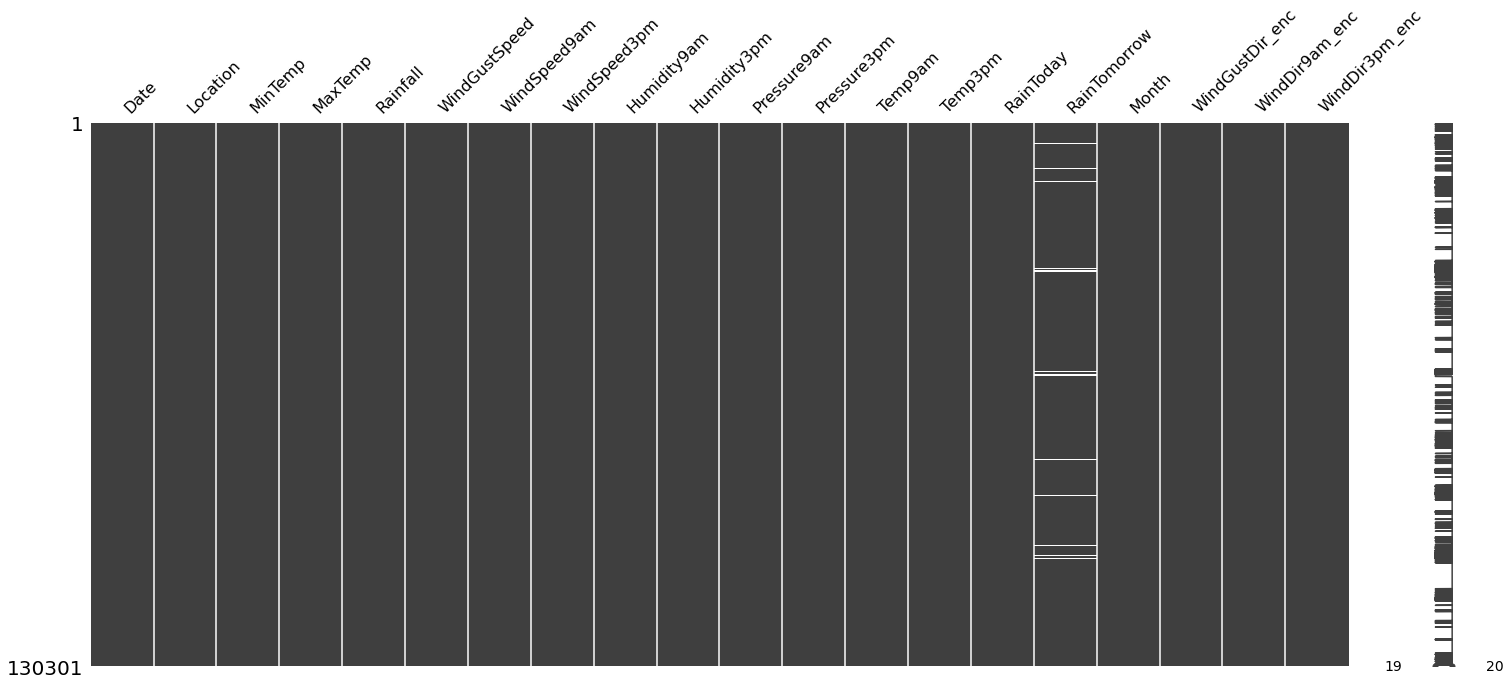

In [45]:
msno.matrix(weather_new)

### Encode Location column

In [47]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
weather_new["Location_enc"] = le.fit_transform(weather_new["Location"])

### Drop Date Column

In [48]:
weather_num = weather_new.drop(["Location", "Date"], axis=1)

## Exploratory Data Analysis

<AxesSubplot:>

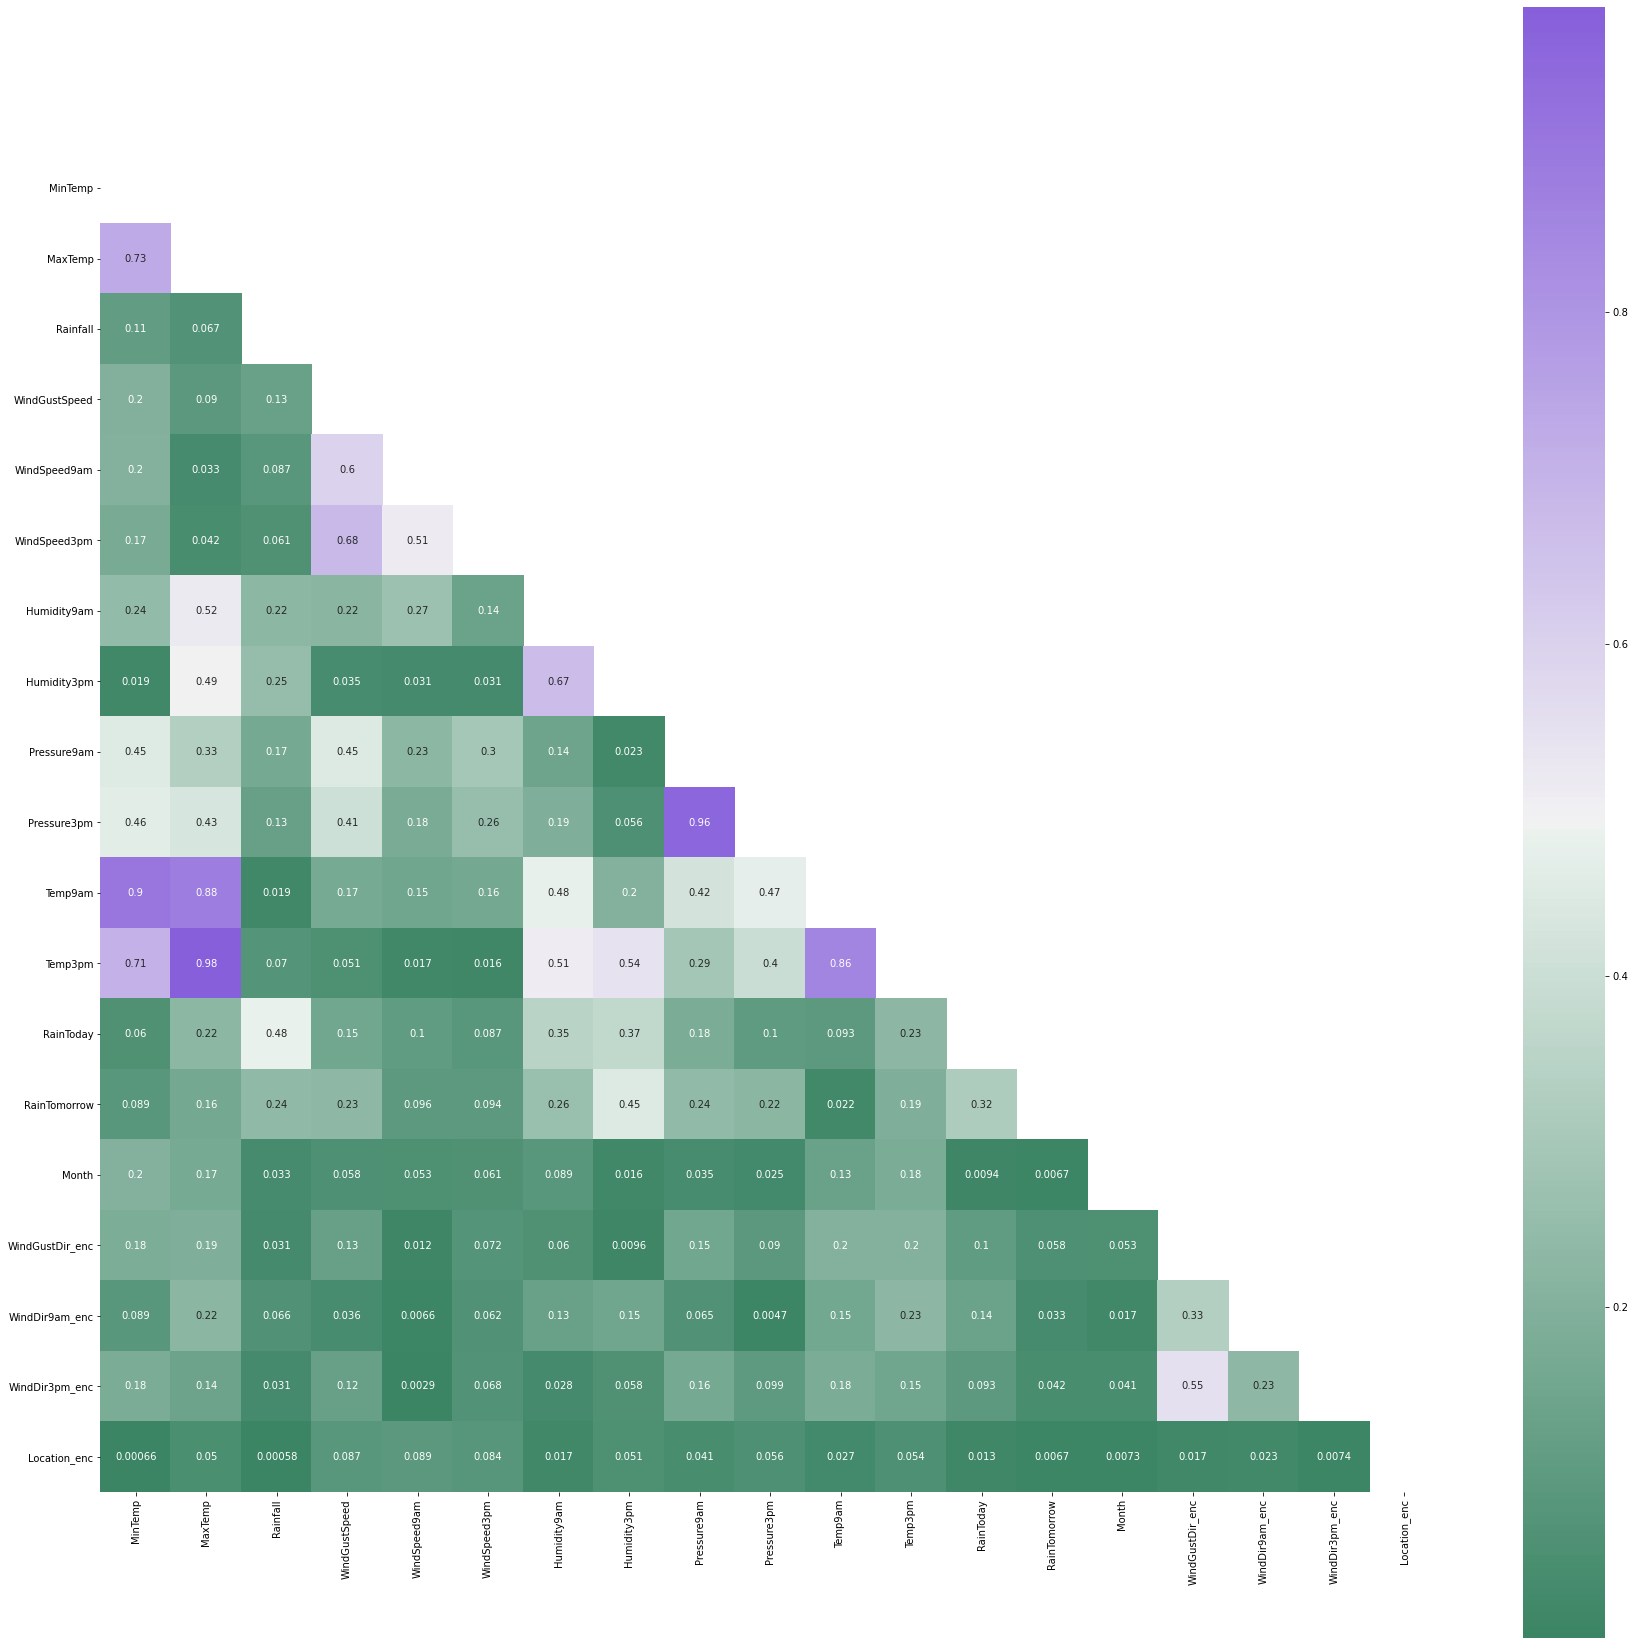

In [49]:
correlation = weather_num.corr().abs()
mask = np.triu(np.ones_like(correlation, dtype=np.bool))

plt.figure(figsize = (30, 30))
cmap = sns.diverging_palette(150, 275, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, square=True, annot=True)

## Split Data into Train and Test sets

In [50]:
#Divide dataset into train and test based on its availability of RainTomorrow data
#Training dataset would be further split into train and validation sets for testing purposes
test = weather_num[weather_num["RainTomorrow"].isnull()]
test = test.drop(['RainTomorrow'], axis=1)
print (test.head())

     MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
14       8.4     24.6       0.0           39.6           4.0          30.0   
283      2.6     18.2       0.0           35.4           6.0          13.0   
435     22.1     35.1       0.0           37.2           6.0          11.0   
437     21.5     35.0       0.0           37.2           9.0           7.0   
443     15.5     30.6       0.0           37.2           6.0          11.0   

     Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
14          57.0         32.0       1009.7       1008.7     15.9     23.5   
283         71.0         55.0       1017.8       1017.6      9.7     14.3   
435         58.0         37.0       1020.9       1017.8     26.9     33.5   
437         76.0         35.0       1015.8       1010.3     24.2     33.1   
443         66.0         30.0       1015.9       1013.8     19.4     30.0   

     RainToday  Month  WindGustDir_enc  WindDir9am_enc  WindDir3pm_e

In [51]:
train = weather_num[weather_num["RainTomorrow"].notnull()]
print (train.head())

   MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0     13.4     22.9       0.6           44.0          20.0          24.0   
1      7.4     25.1       0.0           44.0           4.0          22.0   
2     12.9     25.7       0.0           46.0          19.0          26.0   
3      9.2     28.0       0.0           24.0          11.0           9.0   
4     17.5     32.3       1.0           41.0           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
0         71.0         22.0       1007.7       1007.1     16.9     21.8   
1         44.0         25.0       1010.6       1007.8     17.2     24.3   
2         38.0         30.0       1007.6       1008.7     21.0     23.2   
3         45.0         16.0       1017.6       1012.8     18.1     26.5   
4         82.0         33.0       1010.8       1006.0     17.8     29.7   

   RainToday  RainTomorrow  Month  WindGustDir_enc  WindDir9am_enc  \
0        0.0          

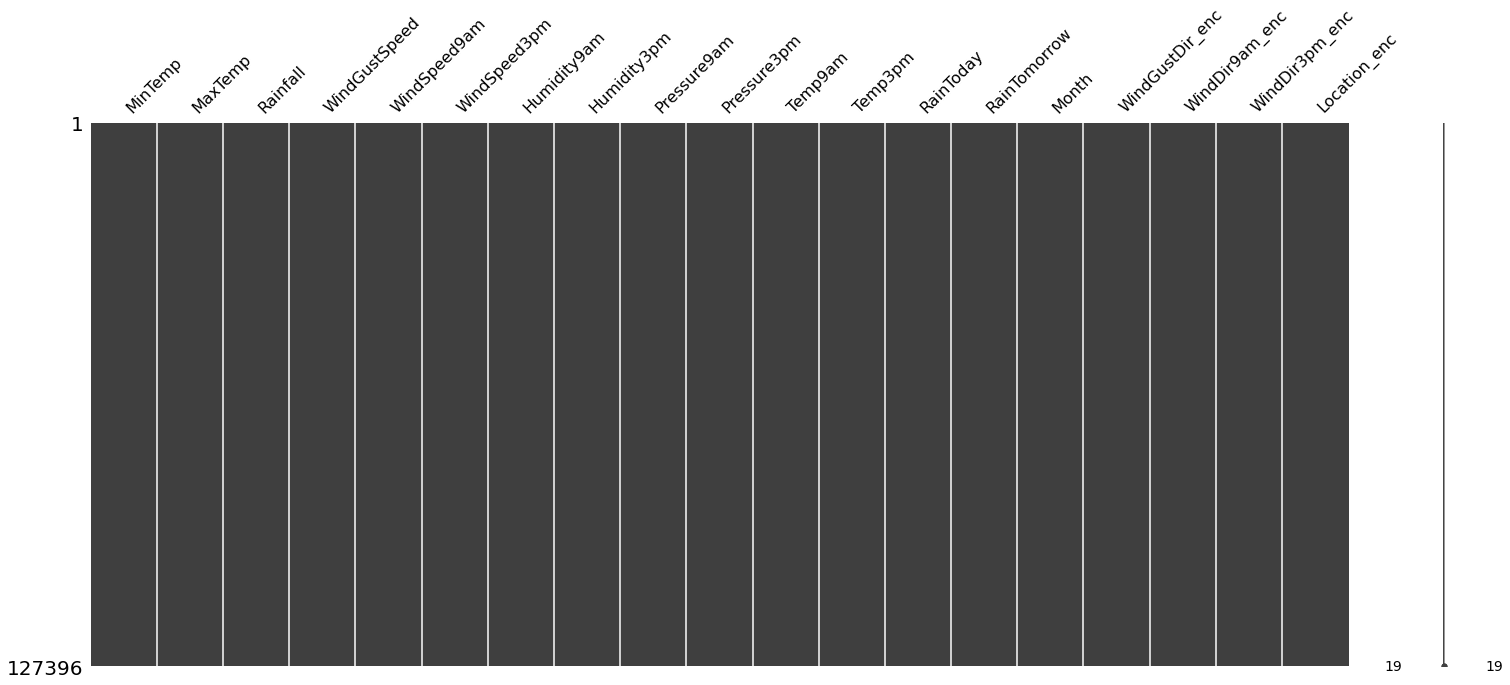

In [52]:
msno.matrix(train)
plt.show()

In [53]:
#Create list of train and test set
all_data = [train, test]

## Investigate Class Imbalance

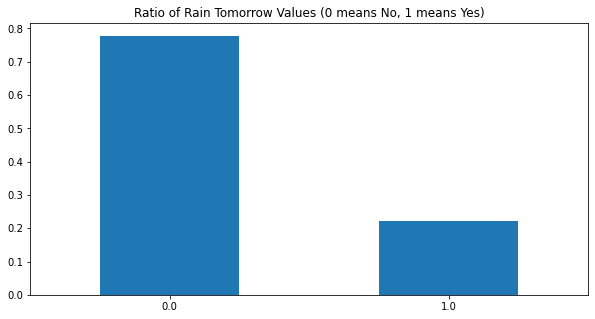

In [54]:
#Visualize class imbalance
plt.figure(figsize = (10, 5))
train.RainTomorrow.value_counts(normalize = True).plot(kind='bar', rot=0)
plt.title("Ratio of Rain Tomorrow Values (0 means No, 1 means Yes)")
plt.show()

In [55]:
#Ratio between No and Yes is almost 3:1, the class imbalance could be obviously seen
#We are going to oversample minority counts (RainToday of 1)
from imblearn.over_sampling import RandomOverSampler

X = train.drop(["RainTomorrow"], axis=1)
y = train[['RainTomorrow']]

ros = RandomOverSampler(random_state=42)

#fit predictor and target variable
X_res, y_res = ros.fit_resample(X, y)

print (y_res.value_counts())

RainTomorrow
1.0             99038
0.0             99038
dtype: int64


## Data Training and Modelling

In [56]:
#Split Train dataset further into train and validation data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=123)

In [57]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)

In [58]:
#Import needed metrics library
import time
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, roc_curve, classification_report

Model to try:
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. XGBoost
5. AdaBoost with Decision Tree Classifier
6. Linear SVM
7. Voting Classifier

### Logistic Regression 

Accuracy = 0.7831179321486268
ROC under Curve = 0.7831246667653778
Time proceeded = 2.526808738708496
              precision    recall  f1-score   support

         0.0    0.77261   0.80218   0.78712     19801
         1.0    0.79446   0.76407   0.77897     19815

    accuracy                        0.78312     39616
   macro avg    0.78353   0.78312   0.78304     39616
weighted avg    0.78354   0.78312   0.78304     39616



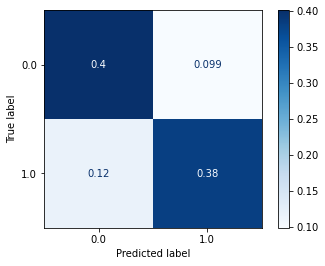

In [59]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

t0_logreg = time.time()
logreg = LogisticRegression(penalty='l1', solver='saga')
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_val)

logreg_accuracy = accuracy_score(y_val, y_pred_lr)
logreg_rocauc = roc_auc_score(y_val, y_pred_lr)
tt_logreg = time.time() - t0_logreg

print("Accuracy = {}".format(logreg_accuracy))
print("ROC under Curve = {}".format(logreg_rocauc))
print("Time proceeded = {}". format(tt_logreg))
print(classification_report(y_val, y_pred_lr, digits=5))

plot_confusion_matrix(logreg, X_val, y_val, cmap=plt.cm.Blues, normalize="all")

### Decision Tree Classifier

Accuracy = 0.8448859046849758
ROC under Curve = 0.8448748507146486
Time proceeded = 1.111475944519043
              precision    recall  f1-score   support

         0.0    0.86781   0.81360   0.83983     19801
         1.0    0.82467   0.87615   0.84963     19815

    accuracy                        0.84489     39616
   macro avg    0.84624   0.84487   0.84473     39616
weighted avg    0.84623   0.84489   0.84473     39616



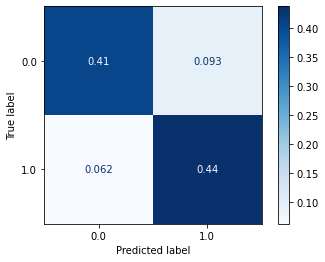

In [60]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier

t0_dtc = time.time()
dtc = DecisionTreeClassifier(max_depth=16, max_features='sqrt')
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_val)

dtc_accuracy = accuracy_score(y_val, y_pred_dtc)
dtc_rocauc = roc_auc_score(y_val, y_pred_dtc)
tt_dtc = time.time() - t0_dtc

print("Accuracy = {}".format(dtc_accuracy))
print("ROC under Curve = {}".format(dtc_rocauc))
print("Time proceeded = {}". format(tt_dtc))
print(classification_report(y_val, y_pred_dtc, digits=5))

plot_confusion_matrix(dtc, X_val, y_val, cmap=plt.cm.Blues, normalize="all")

### Random Forest Classifier

Accuracy = 0.8907259693053312
ROC under Curve = 0.890720647989764
Time proceeded = 87.69075655937195
              precision    recall  f1-score   support

         0.0    0.90279   0.87566   0.88902     19801
         1.0    0.87937   0.90578   0.89238     19815

    accuracy                        0.89073     39616
   macro avg    0.89108   0.89072   0.89070     39616
weighted avg    0.89108   0.89073   0.89070     39616



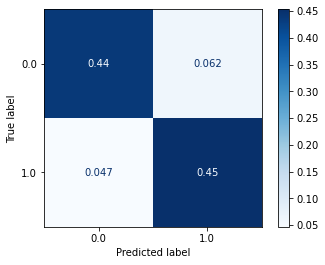

In [61]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

t0_rfc = time.time()
rfc = RandomForestClassifier(n_estimators= 150, max_depth=15, random_state=1234)
rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_val)

rfc_accuracy = accuracy_score(y_val, y_pred_rfc)
rfc_rocauc = roc_auc_score(y_val, y_pred_rfc)
tt_rfc = time.time() - t0_rfc

print("Accuracy = {}".format(rfc_accuracy))
print("ROC under Curve = {}".format(rfc_rocauc))
print("Time proceeded = {}". format(tt_rfc))
print(classification_report(y_val, y_pred_rfc, digits=5))

plot_confusion_matrix(rfc, X_val, y_val, cmap=plt.cm.Blues, normalize="all")

### XGBoost Classifier

[11:38:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy = 0.8916599353796446
ROC under Curve = 0.8916517685566391
Time proceeded = 34.53080701828003
              precision    recall  f1-score   support

         0.0    0.91057   0.86854   0.88906     19801
         1.0    0.87443   0.91476   0.89414     19815

    accuracy                        0.89166     39616
   macro avg    0.89250   0.89165   0.89160     39616
weighted avg    0.89249   0.89166   0.89160     39616



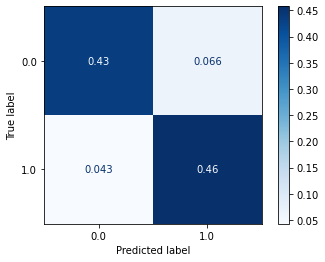

In [62]:
#XGBoostClassifier
import xgboost as xgb

t0_xgb = time.time()
xgbc = xgb.XGBClassifier(n_estimators= 550, random_state=1234)
xgbc.fit(X_train, y_train)

y_pred_xgbc = xgbc.predict(X_val)

xgbc_accuracy = accuracy_score(y_val, y_pred_xgbc)
xgbc_rocauc = roc_auc_score(y_val, y_pred_xgbc)
tt_xgb = time.time() - t0_xgb

print("Accuracy = {}".format(xgbc_accuracy))
print("ROC under Curve = {}".format(xgbc_rocauc))
print("Time proceeded = {}". format(tt_xgb))
print(classification_report(y_val, y_pred_xgbc, digits=5))

plot_confusion_matrix(xgbc, X_val, y_val, cmap=plt.cm.Blues, normalize="all")

### AdaBoost-ing Decision Tree Classifier

Accuracy = 0.959763731825525
ROC under Curve = 0.9597585886204117
Time proceeded = 114.03054547309875
              precision    recall  f1-score   support

         0.0    0.97352   0.94520   0.95916     19801
         1.0    0.94679   0.97431   0.96035     19815

    accuracy                        0.95976     39616
   macro avg    0.96016   0.95976   0.95975     39616
weighted avg    0.96015   0.95976   0.95976     39616



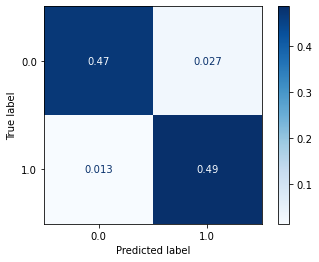

In [63]:
#AdaBoost-ing DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

t0_adb = time.time()
adb = AdaBoostClassifier(base_estimator=dtc, n_estimators=150)
adb.fit(X_train, y_train)

y_pred_adb = adb.predict(X_val)

adb_accuracy = accuracy_score(y_val, y_pred_adb)
adb_rocauc = roc_auc_score(y_val, y_pred_adb)
tt_adb = time.time() - t0_adb

print("Accuracy = {}".format(adb_accuracy))
print("ROC under Curve = {}".format(adb_rocauc))
print("Time proceeded = {}". format(tt_adb))
print(classification_report(y_val, y_pred_adb, digits=5))

plot_confusion_matrix(adb, X_val, y_val, cmap=plt.cm.Blues, normalize="all")

### Linear Support Vector Machine

Accuracy = 0.7802907915993538
ROC under Curve = 0.7802985249536191
Time proceeded = 1.3831181526184082
              precision    recall  f1-score   support

         0.0    0.76842   0.80218   0.78494     19801
         1.0    0.79324   0.75842   0.77544     19815

    accuracy                        0.78029     39616
   macro avg    0.78083   0.78030   0.78019     39616
weighted avg    0.78084   0.78029   0.78019     39616



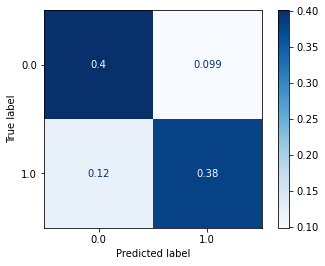

In [64]:
#LinearSVC
from sklearn.svm import LinearSVC

t0_svm = time.time()
svm = LinearSVC(dual=False, C=0.0001)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_val)

svm_accuracy = accuracy_score(y_val, y_pred_svm)
svm_rocauc = roc_auc_score(y_val, y_pred_svm)
tt_svm = time.time() - t0_svm

print("Accuracy = {}".format(svm_accuracy))
print("ROC under Curve = {}".format(svm_rocauc))
print("Time proceeded = {}". format(tt_svm))
print(classification_report(y_val, y_pred_svm, digits=5))

plot_confusion_matrix(svm, X_val, y_val, cmap=plt.cm.Blues, normalize="all")

### Voting Classifier

Accuracy = 0.8766155088852988
ROC under Curve = 0.8766091599555879
Time proceeded = 60.44304347038269
              precision    recall  f1-score   support

         0.0    0.89058   0.85864   0.87432     19801
         1.0    0.86363   0.89457   0.87883     19815

    accuracy                        0.87662     39616
   macro avg    0.87710   0.87661   0.87657     39616
weighted avg    0.87710   0.87662   0.87658     39616



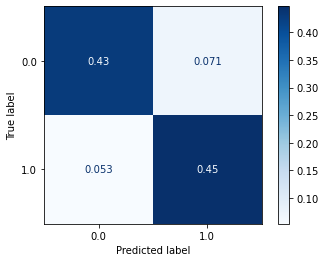

In [65]:
#VotingClassifier among Logistic Regression, RandomForest, and DecisionTree
from sklearn.ensemble import VotingClassifier

t0_vc = time.time()
vc = VotingClassifier(estimators=[('lr', logreg), ('rf', rfc), ('dt', dtc)], voting='soft', weights=[1,3,2], flatten_transform=True)
vc.fit(X_train, y_train)

y_pred_vc = vc.predict(X_val)

vc_accuracy = accuracy_score(y_val, y_pred_vc)
vc_rocauc = roc_auc_score(y_val, y_pred_vc)
tt_vc = time.time() - t0_vc

print("Accuracy = {}".format(vc_accuracy))
print("ROC under Curve = {}".format(vc_rocauc))
print("Time proceeded = {}". format(tt_vc))
print(classification_report(y_val, y_pred_vc, digits=5))

plot_confusion_matrix(vc, X_val, y_val, cmap=plt.cm.Blues, normalize="all")

In [66]:
#Create Dataframe of Machine Learning Model scores
accuracy_scores = [logreg_accuracy, dtc_accuracy, rfc_accuracy, xgbc_accuracy, adb_accuracy, svm_accuracy, vc_accuracy]
roc_auc_scores = [logreg_rocauc, dtc_rocauc, rfc_rocauc, xgbc_rocauc, adb_rocauc, svm_rocauc, vc_rocauc]
tt = [tt_logreg, tt_dtc, tt_rfc, tt_xgb, tt_adb, tt_svm, tt_vc]

ml_data = {'Model': ['Logistic Regression','Decision Tree','Random Forest','XGBoost','AdaBoost','Support Vector','Voting'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Time Proceeded': tt}
ml_summary = pd.DataFrame(ml_data)

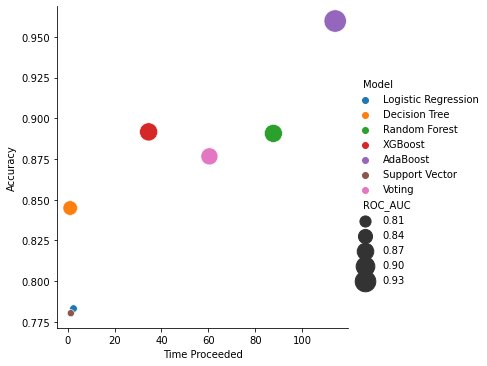

In [71]:
#Plot the Model Scores for Comparison
sns.relplot(x="Time Proceeded", y="Accuracy", data=ml_summary, kind="scatter", size="ROC_AUC", sizes=(50,500), hue="Model")
plt.show()

Ideally, we would choose model which gives accuracy and ROC scores as high as possible with fewer time needed. In this case, AdaBoost give highest scores on both accuracy and ROC_AUC, albeit with longer time taken. On the other hand, XGBoost would still give high scores on accuracy and ROC_AUC with less time than Voting Classifier or Random Forest. However, considering the time proceeded in AdaBoost modelling is not significantly time-consuming with such large data, I will try to predict in test dataset with AdaBoost

In [72]:
#Standardize the features first

X_test = scaler.fit_transform(test)

#Then Adaboost it

y_test = adb.predict(X_test)
test["RainTomorrow"] = y_test

In [73]:
print (test.head())

     MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
14       8.4     24.6       0.0           39.6           4.0          30.0   
283      2.6     18.2       0.0           35.4           6.0          13.0   
435     22.1     35.1       0.0           37.2           6.0          11.0   
437     21.5     35.0       0.0           37.2           9.0           7.0   
443     15.5     30.6       0.0           37.2           6.0          11.0   

     Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
14          57.0         32.0       1009.7       1008.7     15.9     23.5   
283         71.0         55.0       1017.8       1017.6      9.7     14.3   
435         58.0         37.0       1020.9       1017.8     26.9     33.5   
437         76.0         35.0       1015.8       1010.3     24.2     33.1   
443         66.0         30.0       1015.9       1013.8     19.4     30.0   

     RainToday  Month  WindGustDir_enc  WindDir9am_enc  WindDir3pm_e

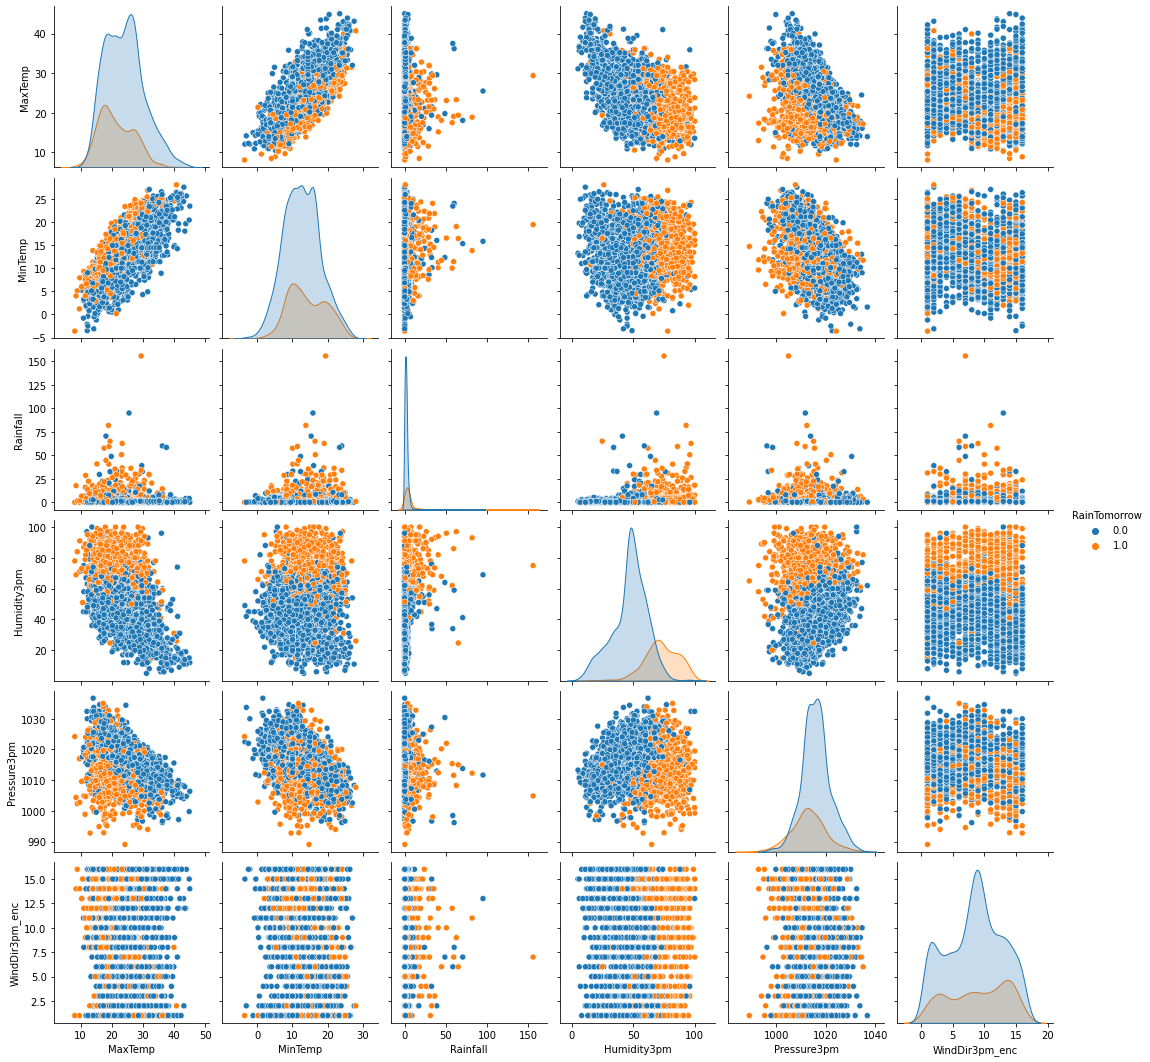

In [74]:
#Visualize test dataset
sns.pairplot(data=test, vars=('MaxTemp','MinTemp','Rainfall', 'Humidity3pm','Pressure3pm', 'WindDir3pm_enc'), hue='RainTomorrow')
plt.show()

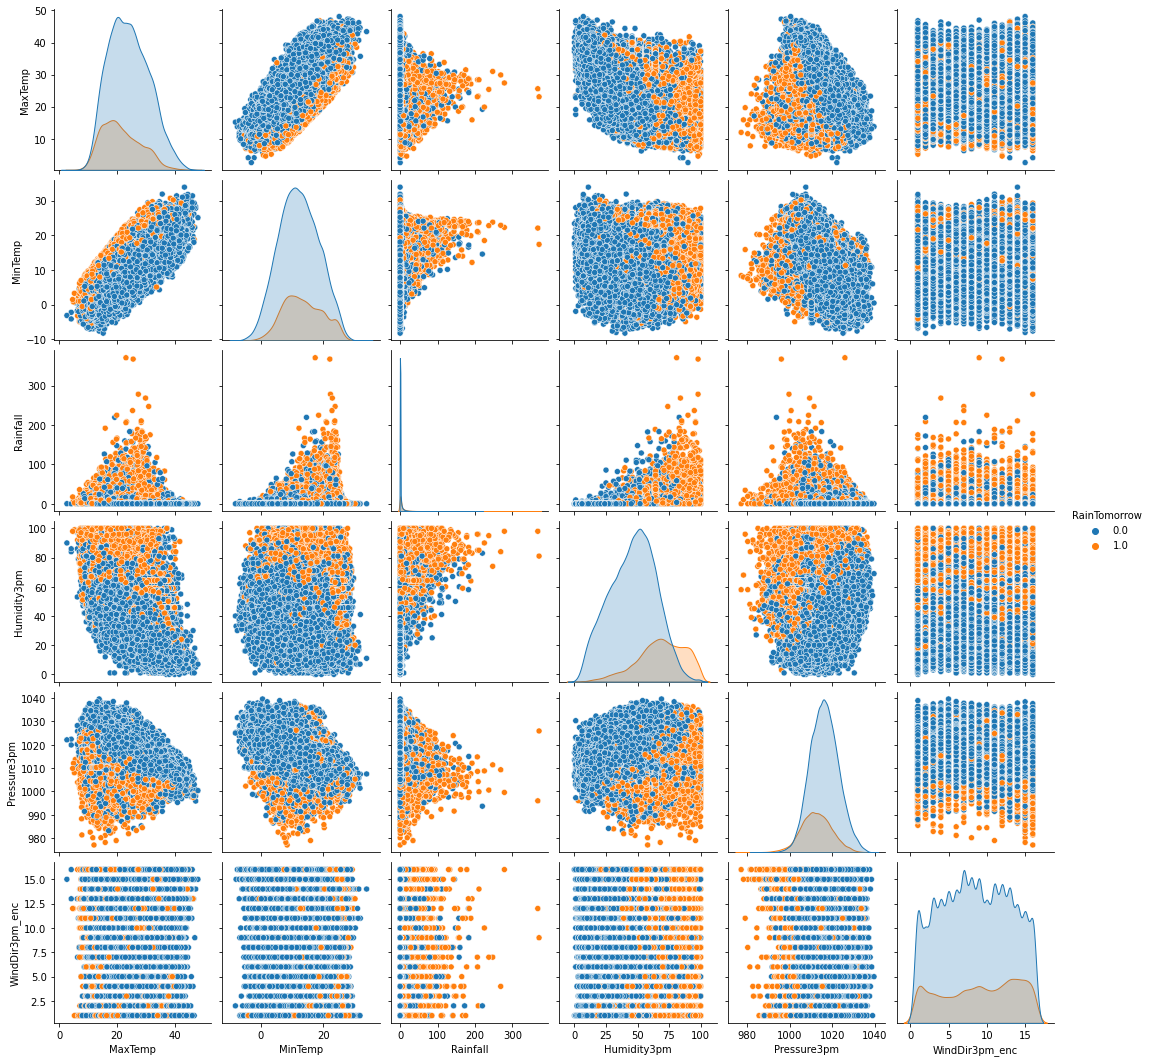

In [75]:
#Visualize test dataset
sns.pairplot(data=train, vars=('MaxTemp','MinTemp','Rainfall', 'Humidity3pm','Pressure3pm', 'WindDir3pm_enc'), hue='RainTomorrow')
plt.show()